# UnSupervised Learning

<a target="_blank" href="https://colab.research.google.com/github/web3foru/Machine-learning-meetings/blob/main/unsupervised-learning-clustering/UnSupervised%20Learning%20-%20Clustering.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [39]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.colors import ListedColormap
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)
from sklearn import datasets
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Agenda

1. Definción de aprendizaje No supervisado
2. Ejemplos de aprendizaje No supervisado
3. Clustering - Kmeans, definición e implementación (Code)
4. Clustering - Modelo de mezclas de funciones Gausinas definición e implementación (Code)
5. Caso practico.

## 1. Definición

![img](resources/learnings.png)

Este también es conocido como aprendizaje descriptivo y el conjunto de datos necesario está compuesto solo por las características (features) de cada muestra, matemáticamente hablado tenemos: $\mathcal{D} = \left\lbrace  \left( {\bf{x}}_i \right) \right\rbrace _{i=1} ^{N}$, en donde $X_i$ es el vector de características de la muestra $i$ del dataset

Ejemplo: agrupar imagenes

## Clustering

Es una tarea que consiste en el agrupamiento de datos de tal manera que objetos que compartan características similares, se encuentre en un mismo grupo.

<img align="left"  src="resources/dog_cats.png" right alt="drawing" width="500"/>

<img align="left"  src="resources/red_social.png" right alt="drawing" width="400"/>



# 2. Ejemplos de aprendizaje No supervisado

### 1. Customer segmentation

Comprender los diferentes grupos de clientes en torno a los cuales construir estrategias de marketing u otras estrategias comerciales.

<img align="left"  src="resources/customer_segmentation.jpg" right alt="drawing" width="400"/>

### 2. Recommender systems

Agrupar a usuarios con patrones de comportamiento(visualización,compras, busquedas,etc) similares para recomendar contenidos similares.
<img align="left"  src="resources/recomend.png" right alt="drawing" width="400"/>

### 3. Anomaly detection

Detección de fraudes, comportamientos anormales

<img align="left"  src="resources/anomaly.png" right alt="drawing" width="300"/>

### 4. Redesigning the store and placing

<img align="left"  src="resources/redesign.jpeg" right alt="drawing" width="600"/>

### Métodos de clustering¶

1. **Métodos duros:** En este caso se asigna cada muestra a exactamente un sólo cluster: La limitación de este enfoque es que no existe una medida de incertidumbre o probabilidad que nos diga cuánto un punto de datos está asociado con un grupo específico.
2. **Métodos suaves:** Métodos que asignan cada muestra a diferentes clusters con un valor de probabilidad

# 3. Kmeans (método duro)

Supongamos que tenemos un conjunto de datos con dos features como el siguiente:

<img align="left"  src="resources/cluster_1.png" right alt="drawing" width="300"/>

Nuestro trabajo es encontrar conjuntos de puntos que parezcan estar juntos. En este caso, podemos identificar claramente dos grupos de puntos que colorearemos de azul y rojo, respectivamente:

<img align="left"  src="resources/cluster_2.png" right alt="drawing" width="300"/>

**Nota**: μ1 y μ2 son los centroides de cada grupo y son parámetros que identifican a cada uno de estos

Este algoritmo agrupa los datos intentando separar las muestras en **K grupos** de igual varianza, minimizando un criterio conocido como la inercia o la dispersión intra-cluster definida así:

$\sum_{k=1}^K \sum_{{\bf{x}}_k \in C_k} \| {\bf{x}}_k - \mu_k\|^2$

Donde **$\mu_k$** corresponde al **$k$-ésimo** centroide del cluster y $C_k$ representa todo el conjunto de muestras pertenecientes al cluster  $k$

Este algoritmo trata de encontrar las medias de cada cluster (centroides). Se debe cumplir que todos los puntos(muestras) en un cluster están más cercanos a su centroide que al centroide de cualquier otro cluster.

<img align="left"  src="resources/Lloyd.png" right alt="drawing" width="500"/>

<img align="left"  src="resources/K-means.gif" right alt="drawing" width="500"/>

<img align="left"  src="resources/kmeans.gif" right alt="drawing" width="400"/>

### Desventaja

Depende de la inicialización de los centroides, se recomienda usar no una inicialización aleatoria, sino el parámetro init='k-means++', que inicializa los centroides en puntos distantes y produce mejores resultados.

# Ejemplo código

Modelo Kmeans de la librería sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

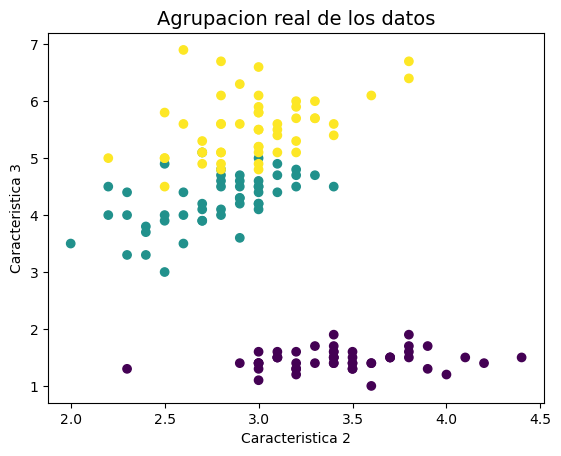

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X = X[:150][:,1:3]
y = y[:150]
plt.title('Agrupacion real de los datos', fontsize=14)
plt.xlabel('Caracteristica 2')
plt.ylabel('Caracteristica 3')
plt.scatter(X[:,0], X[:,1], c=y);

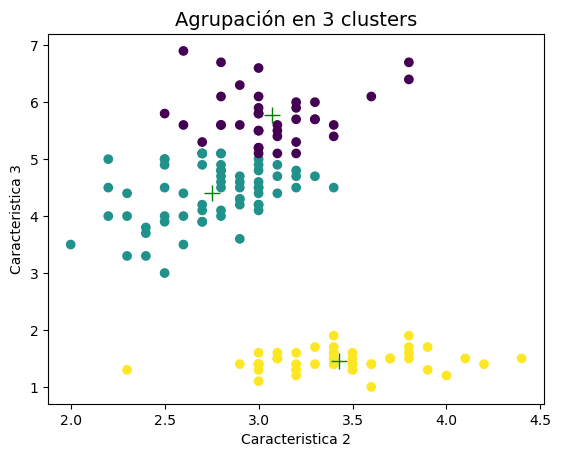

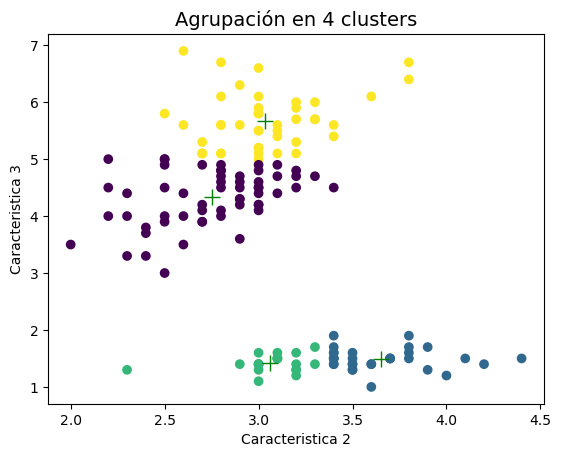

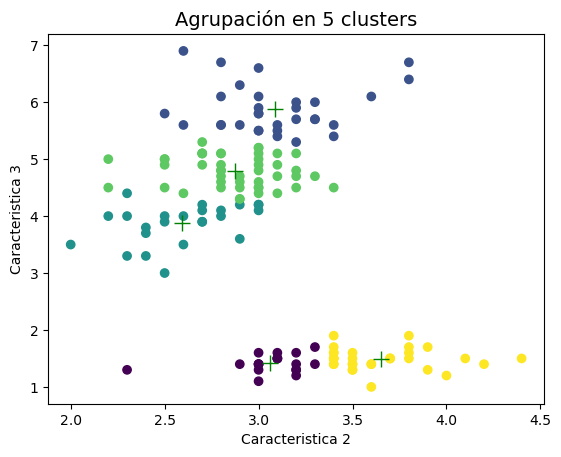

In [4]:
from sklearn.cluster import KMeans

for k in range(3,6):
    
    # Definimos el modelo
    kmeans = KMeans(init='random', n_clusters=k, n_init=1)
    
    # Entrenamos el modelo 
    kmeans.fit(X)
    
    # Realizamos las predicciones
    Y_predict = kmeans.predict(X)
    
    # Graficamos los clusters
    plt.figure()
    plt.title('Agrupación en %d clusters' % k, fontsize=14)
    plt.xlabel('Caracteristica 2')
    plt.ylabel('Caracteristica 3')
    plt.scatter(X[:,0], X[:,1], c=Y_predict)
    
    for c in range(k):
        plt.plot(kmeans.cluster_centers_[c,0],kmeans.cluster_centers_[c,1],color='green',  marker='+', markersize=12)

### Número de clusters

**¿Como determinar el número de clusters?**

Determinar con claridad el número de clusters puede ser una tarea complicada si no se conoce sobre el comportamiento de los datos. 

Existe un método llamado **Elbow**	o método del codo, el cual es una heurística utilizada para determinar el número de **conglomerados** en un conjunto de datos. El método consiste en **trazar** la **variación** explicada en función del número de conglomerados y elegir el **codo de la curva** como el **número** de conglomerados a **utilizar**.

<img align="left"  src="resources/elbow.png" right alt="drawing" width="400"/>

### 1. Utilizando Intra-Cluster Variance
La **variación** puede estar dada por el: **Intra-cluster variance**: Tambien llamado error de suma de cuadrados **(SSE)**.
Se define como la suma de la **distancia al cuadrado** entre el punto promedio (llamado **centroide**) y **cada punto** del grupo. Cuanto **menor** sea el valor, **mejor** será la agrupación.

<img align="left"  src="resources/distances_kmeans.png" right alt="drawing" width="400"/>

<img align="left"  src="resources/intra_cluster_variance.png" right alt="drawing" width="600"/>

Entrenando modelo K-means con  2 clusters
Entrenando modelo K-means con  3 clusters
Entrenando modelo K-means con  4 clusters
Entrenando modelo K-means con  5 clusters
Entrenando modelo K-means con  6 clusters
Entrenando modelo K-means con  7 clusters


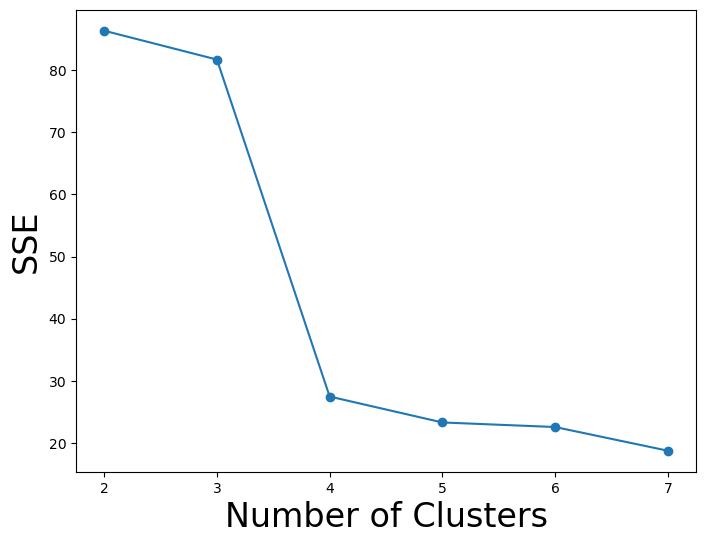

In [5]:
K_Max = 8

plt.figure(figsize=(8, 6))

sses = []
k_means_models = []
sillhoute_scores = []

for k in range(2,K_Max):
    print("Entrenando modelo K-means con ", k,"clusters")
    k_mean_model_k = KMeans(init='random', n_clusters=k, n_init=1)
    k_mean_model_k.fit(X)
    k_means_models.append(k_mean_model_k)
    sses.append(k_mean_model_k.inertia_)
    sillhoute_scores.append(silhouette_score(X, k_mean_model_k.labels_))
    

plt.plot(range(2,K_Max),sses, marker='o')
plt.xlabel('Number of Clusters', fontsize=24)
plt.ylabel('SSE', fontsize=24)
plt.show()

## Acceder a los clusters

In [6]:
k_means_models[2].cluster_centers_

array([[2.6       , 3.94285714],
       [3.428     , 1.462     ],
       [3.08333333, 5.90333333],
       [2.90238095, 4.83571429]])

In [7]:
k_means_models[5].cluster_centers_

array([[2.46666667, 3.69333333],
       [2.88333333, 4.35833333],
       [3.01666667, 4.89444444],
       [3.16363636, 6.35454545],
       [3.045     , 5.625     ],
       [2.58333333, 5.00833333],
       [3.428     , 1.462     ]])

### 2.Utilizando el Coeficiente silhouette

Es otra de las medidas más usadas para escoger el número de clusters, El coeficiente silhouette para una muestra está dado por:

<img align="left"  src="resources/Silhouette.png" right alt="drawing" width="400"/>

- a(i) es la distancia promedio entre este punto de datos dado y todos los demás puntos de datos en el mismo grupo
- b(i) es la distancia promedio entre este punto de datos dado y todos los puntos de datos del grupo más cercano. 

**Nota:** S(i) puede variar de -1 a 1.

- si S(i) = 1, significa que este punto de datos está cerca de puntos dentro del mismo grupo y lejos del grupo vecino.
- si S(i) = 0, significa que este punto de datos está cerca del límite de su grupo.
- si S(i) = -1, significa que este punto de datos está asignado al clúster incorrecto.


El coeficiente de silueta final se calcula como el **coeficiente de silueta promedio** de todos los puntos de datos. Luego calculamos los coeficientes de silueta para los valores de K que van de 2 a N. Cuanto **mayor sea el coeficiente de silueta**, **mejor** será el **agrupamiento**.

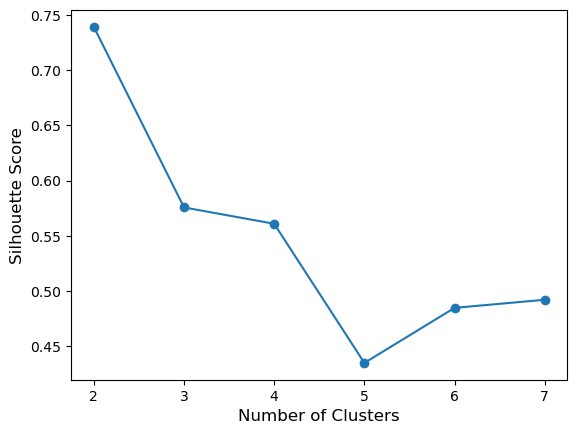

In [8]:
plt.plot(range(2,K_Max),sillhoute_scores, marker='o')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.show()

# 4. Modelos de Mezclas de Funciones Gaussianas
# Gaussian Mixture Models (GMMs) (Método suave)

K-means es Un método de agrupamiento **duro**, lo que significa que **asociará** cada muestra a uno y **solo un** grupo. Una limitación de este enfoque es que **no existe una medida de incertidumbre** o probabilidad que nos diga cuánto una muestra está asociado con un grupo específico **(probabilidad)**. Esto es exactamente lo que intentan hacer los modelos de mezcla gaussiana, o simplemente **GMM**.

Una mezcla gaussiana es una función que se compone de varias gaussianas, cada una identificada por k ∈ {1,…, K}, donde **K** es el número de **grupos** de nuestro conjunto de datos. Cada **k** gaussiano en la mezcla se compone de los siguientes parámetros:

- Un μ medio que define su centro.
- Una covarianza Σ que define su ancho.

<img align="left" src="resources/distribution.png" right alt="drawing" width="500"/>

Aquí podemos ver que hay tres funciones gaussianas, por lo tanto, K = 3. Cada gaussiana explica los datos contenidos en cada uno de los tres grupos disponibles. Los coeficientes de mezcla son en sí mismos probabilidades y deben cumplir esta condición:

<img align="left" src="resources/sum_pro.png" right alt="drawing" width="400"/>

### Funciones de densidad Gausianas

En la regresión logística usamos una función polinomial para separar las clases de interés, podríamos encontrar las funciones de densidad de probabilidad (fdp) de las clases y realizar la clasificación de una muestra con base en la probabilidad de que esa muestra pertenezca a una u otra clase.

Supongamos que tenemos dos clases

<img align="left"  src="resources/funcion_gau.png" right alt="drawing" width="400"/>

Si asumimos por ejemplo que la fdp de cada clase en la figura anterior la vamos a modelar usando funciones de probabilidad Gausianas, entonces la fdp de cada una estará dada por la función:

$p({\bf{x}})=\frac{1}{(2\pi)^{d/2}\left| \Sigma \right|^{1/2} } \exp\left[ -\frac{1}{2} ({\bf{x}} - {\bf{\mu}})^T \Sigma^{-1} ({\bf{x}} - {\bf{\mu}}) \right]$

Es necesario tener en cuenta que los problemas que estamos abordando son de múltiples variables de entrada, entonces la función Gausiana anterior corresponde a una función de varias variables, en donde  corresponde a un **vector de medias**, es decir un vector que contiene las **medias de cada variable** y  es la **matriz de covarianza**.

${\bf{\mu}} = \{\mu_1,\mu_2,\cdots,\mu_d\}, \;\; \Sigma = \begin{bmatrix}
    \sigma_1^2 & \rho_{1,2} \sigma_1 \sigma_2 & \rho_{1,3} \sigma_1 \sigma_3 & \dots  & \rho_{1,d} \sigma_1 \sigma_d \\
    \rho_{2,1} \sigma_2 \sigma_1 & \sigma_2^2 & \rho_{2,3} \sigma_2 \sigma_3 & \dots  & \rho_{2,d} \sigma_2 \sigma_d \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \rho_{d,1} \sigma_d \sigma_1 & \rho_{d,2} \sigma_d \sigma_2 & \rho_{d,3} \sigma_d \sigma_3 & \dots  & \sigma_d^2
\end{bmatrix}$

### Procedimiento para clasificar una nueva muestra

1. Evaluar el vector de característica(${\bf{x}}$) de la muestra en cada una de las funciones de densidad de probabilidad, para cada una las clases, con esto vamos a establecer la probabilidad de que la muestra nueva pertenezca a cada una de las clases, de acuerdo con el modelo que hemos asumido (Gausiano)
2. La clase asignada a la muestra, será la clase para la cual la probabilidad sea mayor.

In [9]:
from matplotlib.patches import Ellipse

def plot_ellipse(ax, mu ,sigma):

    vals, vecs = np.linalg.eigh(sigma)
    
    x , y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y,x))
    
    w,h = 4* np.sqrt(vals)
    
    ax.tick_params(axis='both',which='major',labelsize=20)
    ellipse = Ellipse(mu,w,h,theta,color='k')
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

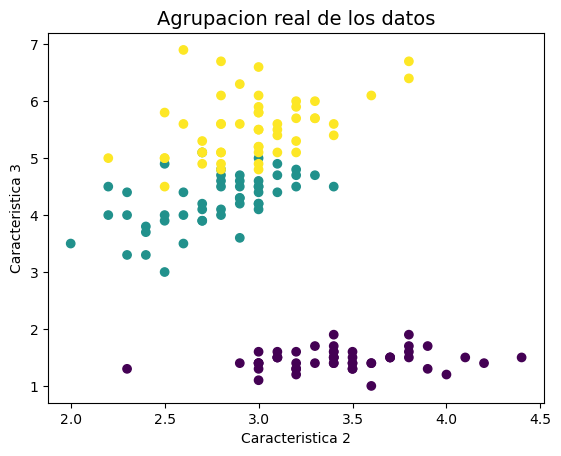

In [10]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X = X[:150][:,1:3]
y = y[:150]
plt.title('Agrupacion real de los datos', fontsize=14)
plt.xlabel('Caracteristica 2')
plt.ylabel('Caracteristica 3')
plt.scatter(X[:,0], X[:,1], c=y);

In [11]:
from sklearn.mixture import GaussianMixture

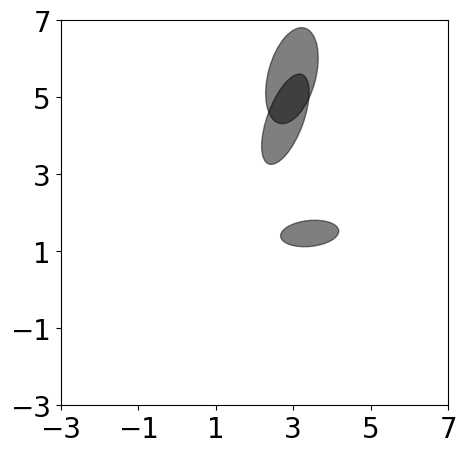

In [12]:
n_components = 3
gmm = GaussianMixture(n_components=n_components, covariance_type='full', max_iter=100)
gmm.fit(X)


fig, ax = plt.subplots(figsize=(5,5))
for i in range(n_components):
    plot_ellipse(ax,gmm.means_[i,:],gmm.covariances_[i,:,:].reshape(2,2))

    
ax.set_xlim(-3, 7)
ax.set_ylim(-3, 7)
ax.set_xticks(np.arange(-3,8,2)) 
ax.set_yticks(np.arange(-3,8,2)) 

# 5. Caso practico.

## 1. Descripción problema

### Mall Customer Segmentation Data

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [13]:
df = pd.read_csv("resources/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [16]:
df.shape

(200, 5)

In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [19]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 2. Entendimiento de variables

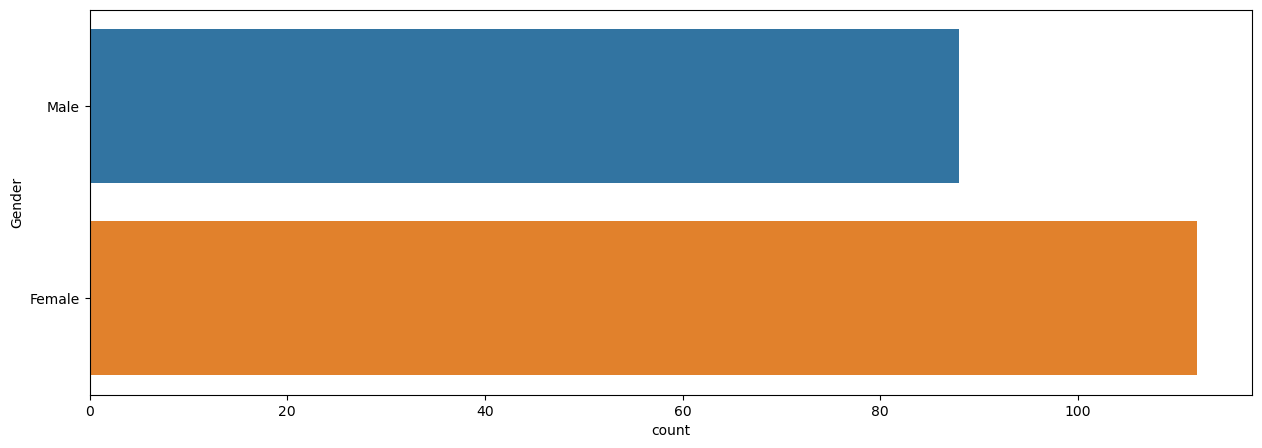

In [20]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

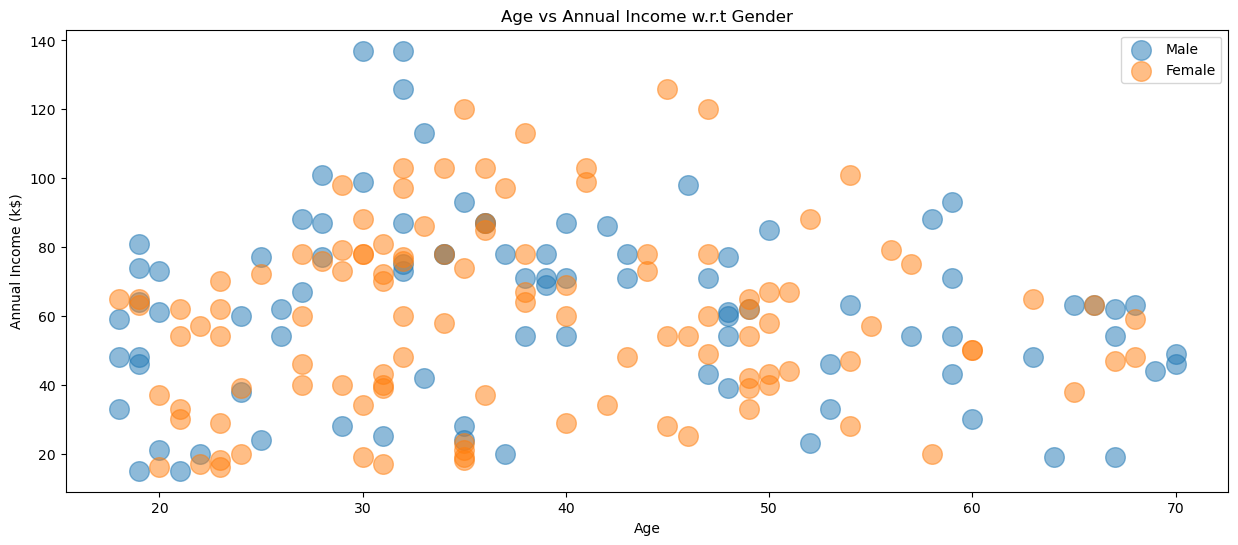

In [21]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

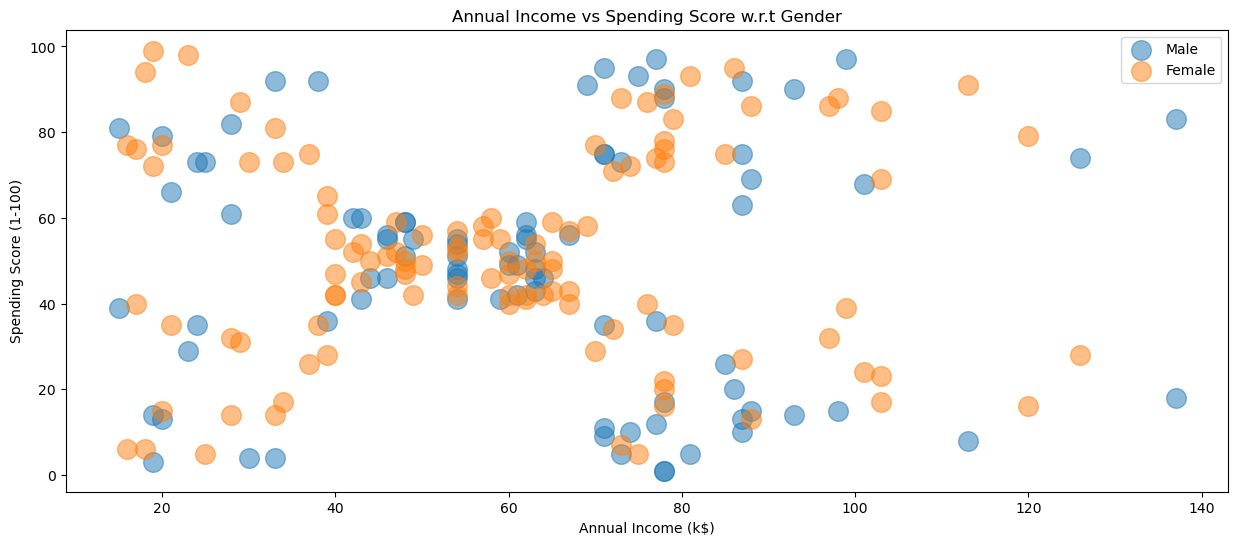

In [22]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Spending Score (1-100)'>]],
      dtype=object)

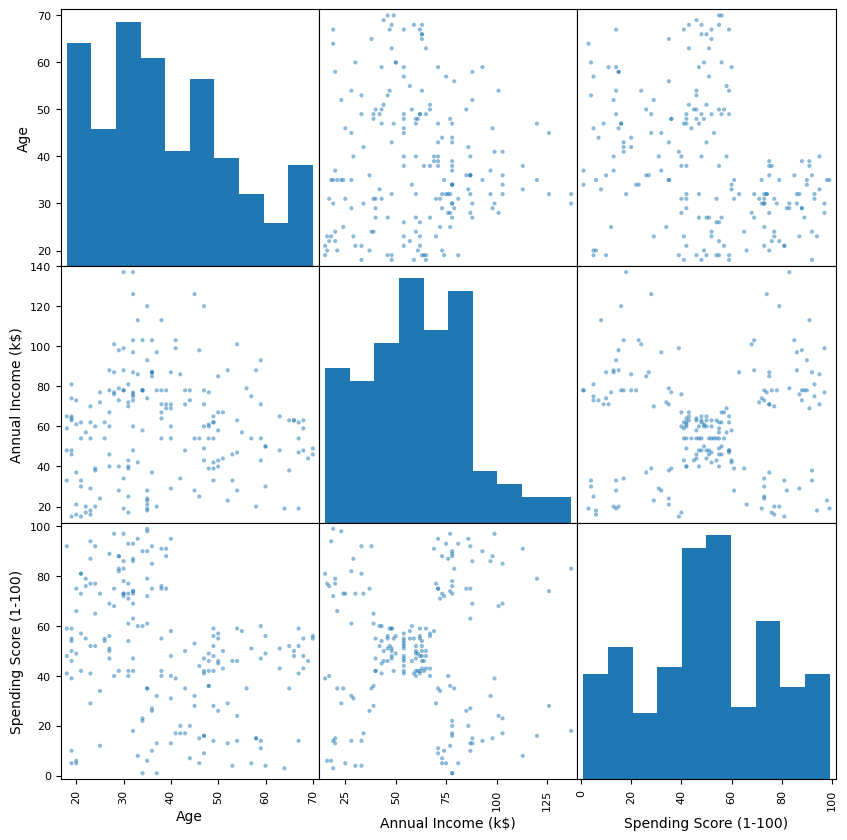

In [23]:
pd.plotting.scatter_matrix(df.iloc[:,2:], figsize=(10,10))

## 3. Experimetación

#### 3.1 Segmentation using Age and Spending Score

In [24]:
X_ = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

In [25]:
inertia = []

for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n , max_iter=300) )
    algorithm.fit(X_)
    inertia.append(algorithm.inertia_)

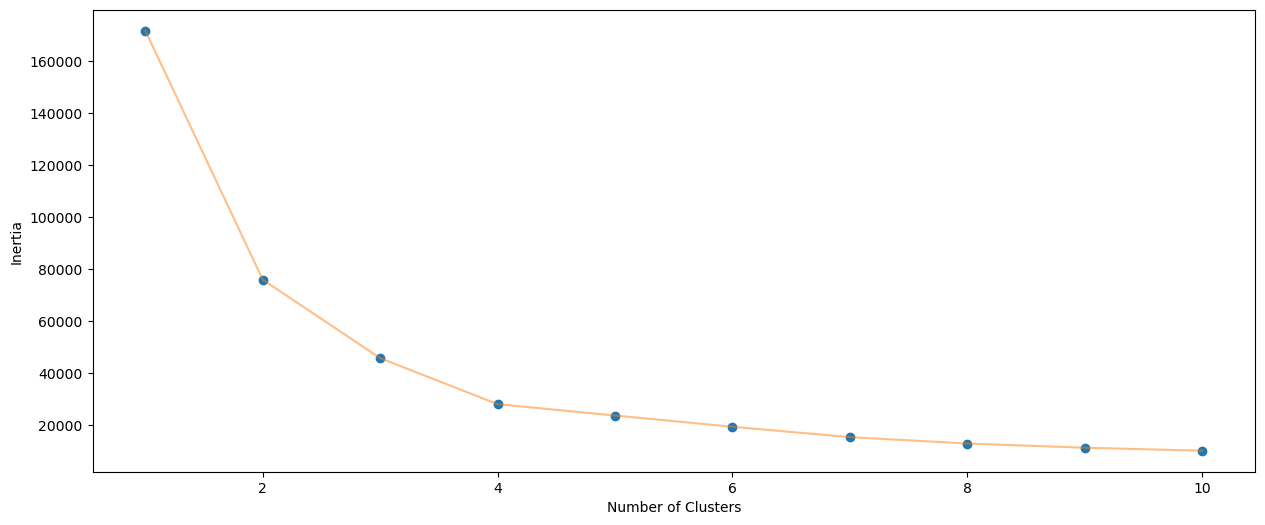

In [26]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [27]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X_)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [28]:
h = 0.02
x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

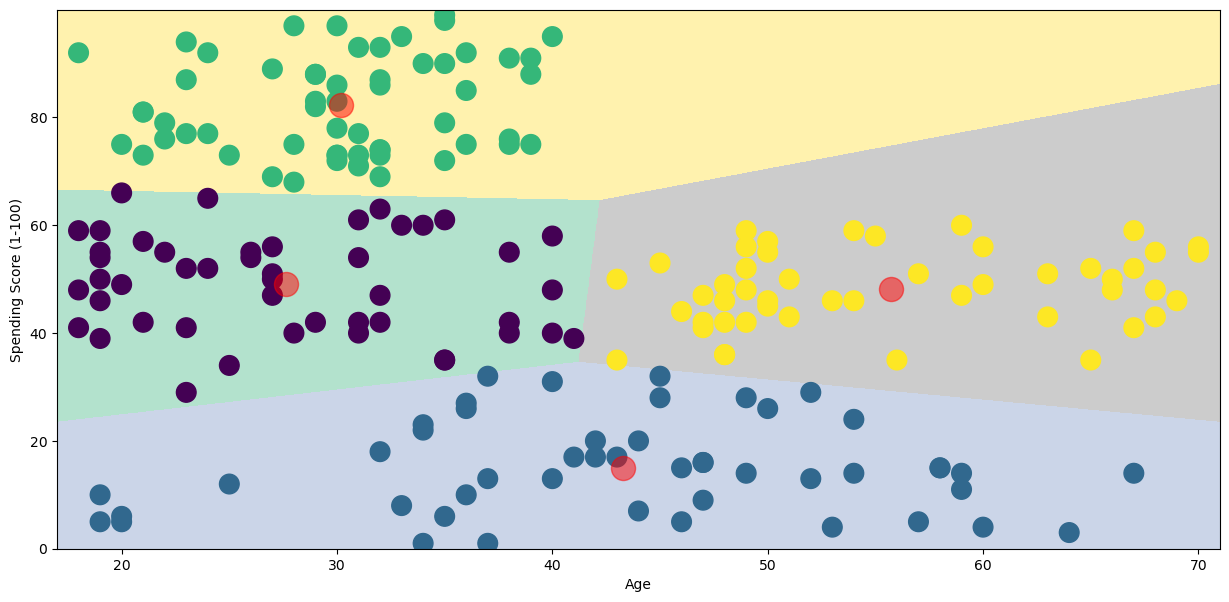

In [29]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

#### 3.2  Segmentation using Annual Income and Spending Score

In [30]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, max_iter=300) )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

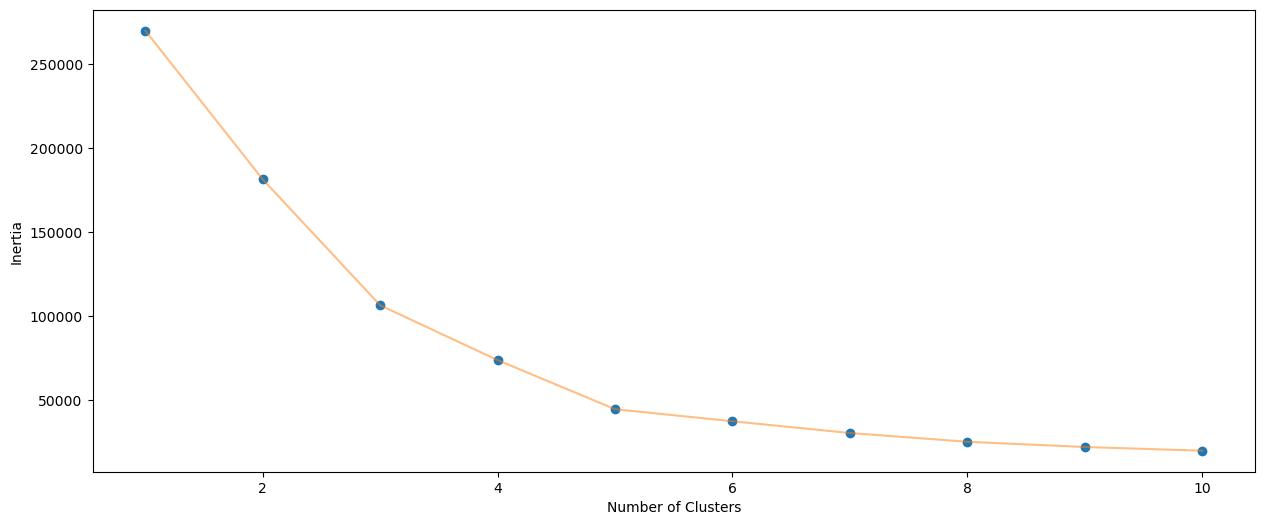

In [31]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [32]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [33]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

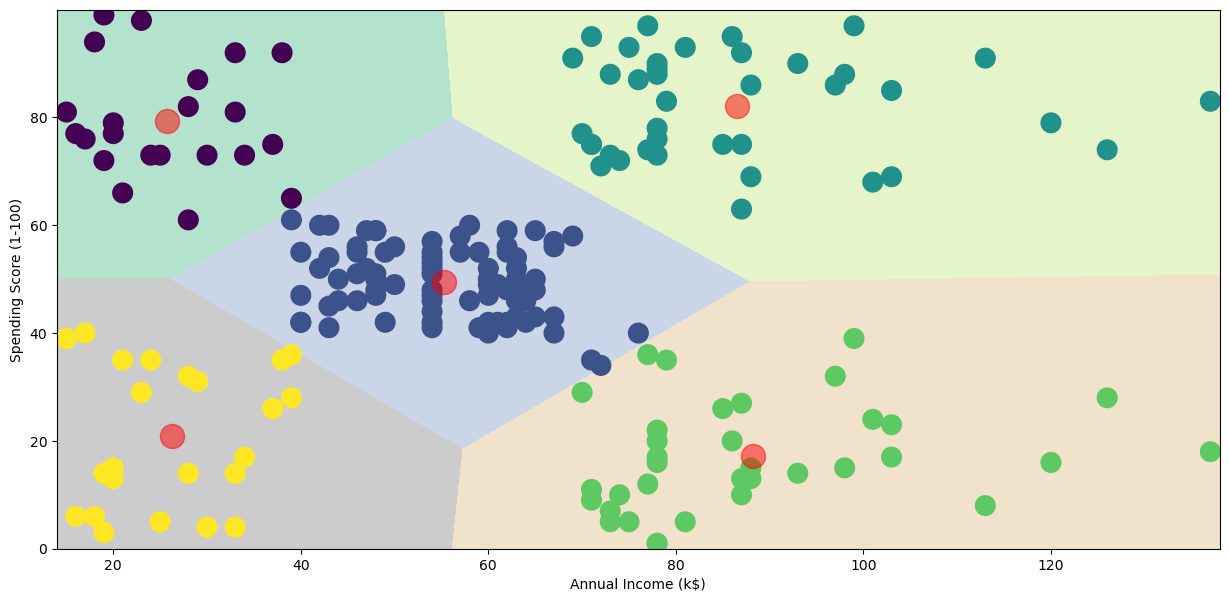

In [34]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

#### 3.3 Segmentation using Age , Annual Income and Spending Score

In [35]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,max_iter=300) )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

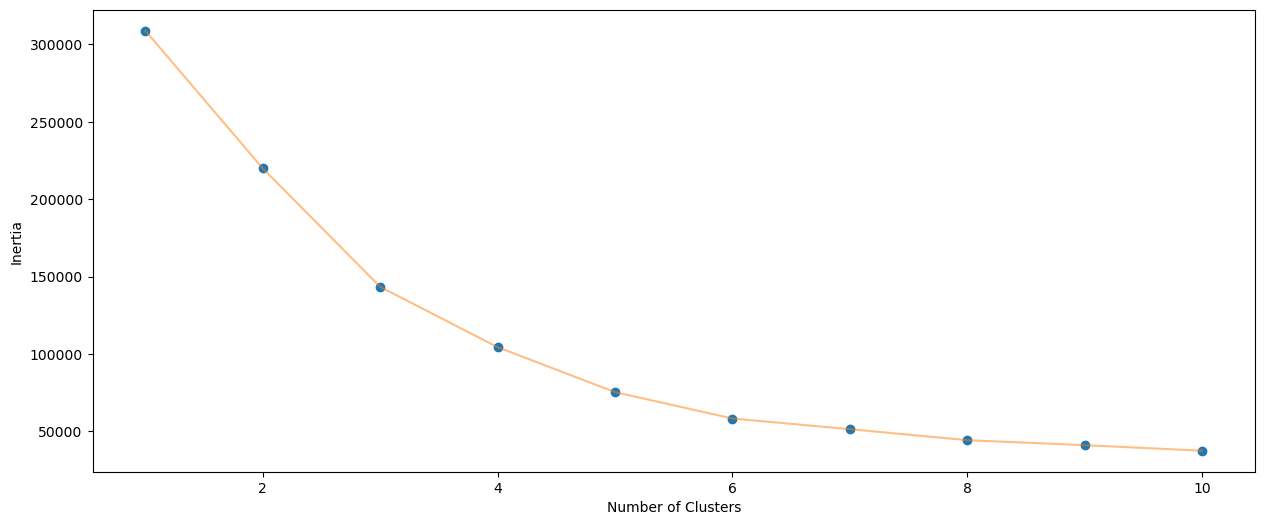

In [36]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [37]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [40]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## Bibliografía

1. https://jdariasl.github.io/ML_2020/Clase%2008%20-%20Modelos%20de%20Mezclas%20de%20Gausianas.html?highlight=gmm
2. https://www.altexsoft.com/blog/unsupervised-machine-learning/
3. https://github.com/jdariasl/ML_2020/blob/master/Clase%2009%20-%20Unsupervised%20Learning.ipynb
4. https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95